## Step 1: Data pre-processing 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# for performing linear algebra
import numpy as np

# for data processing
import pandas as pd

# for visualisation
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("breast-cancer-wisconsin.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.shape

(699, 11)

In [5]:
df.columns=['Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
df.shape

(699, 11)

In [7]:
# Printing the records that contain '?'

df[df['Bare_Nuclei'].str.contains(r'[^0-9a-zA-Z]')]

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [8]:
# Replacing '?' with NaNs

df["Bare_Nuclei"] = df["Bare_Nuclei"].replace("?", np.nan)

In [9]:
# Checking if the replacing of '?' with NaNs was successful

df[df['Bare_Nuclei'].isna()]

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [10]:
# Rplacing NaaNs with median of the column as median is more robust that mean

df['Bare_Nuclei'] = df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median())

In [11]:
# Checking if any NaNs have been left out without getting replaced by the median

df[df['Bare_Nuclei'].isna()]

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [12]:
# Converting Pandas dataframes into Numpy arrays

INP = np.array(df.iloc[:, 1:10])
OUT = np.array(df['Class'])

In [13]:
INP

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [14]:
type(INP)

numpy.ndarray

In [15]:
type(OUT)

numpy.ndarray

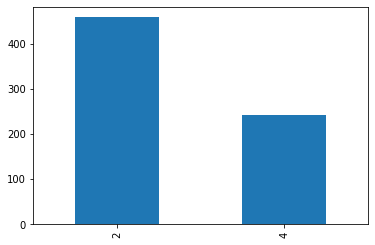

In [16]:
# Visualisation to see the types of classes and no. of data points in each class

df['Class'].value_counts().plot.bar()

In [17]:
# Removing column A which is used as ID and is not used as a feature for prediction

df=df.drop(['Sample_code_number'], axis = 1)
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
df.shape

(699, 10)

## Checking for Outliers

In [19]:
df.columns

Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

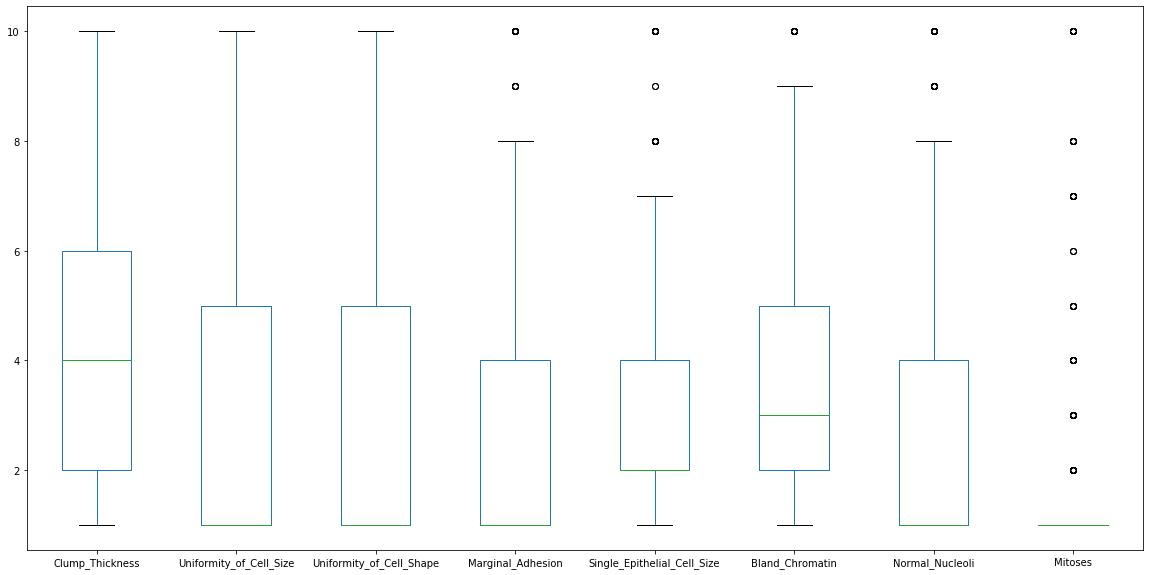

In [20]:
df[['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']].plot.box(figsize = (20, 10))

In [24]:
# From the above boxplots, it may look like we have out;iers in columns Marginal_Adhesion, Single_Epithelial_Cell_Size, Bland_Chromatin, Normal_Nucleoli and Mitoses. But let us inspect further.

#### Column Clump_Thickness

In [25]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Clump_Thickness):
    upper_limit = df[Clump_Thickness].mean() + 3 * df[Clump_Thickness].std()
    lower_limit = df[Clump_Thickness].mean() - 3 * df[Clump_Thickness].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Clump_Thickness")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  12.864961603824849
Lower Limit:  -4.029482347744735


In [26]:
# Printing the outliers

df[(df['Clump_Thickness'] < lower_limit) | (df['Clump_Thickness'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [27]:
# No outliers were detected in column Clump_Thickness

#### Column Uniformity_of_Cell_Size 

In [28]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Uniformity_of_Cell_Size):
    upper_limit = df[Uniformity_of_Cell_Size].mean() + 3 * df[Uniformity_of_Cell_Size].std()
    lower_limit = df[Uniformity_of_Cell_Size].mean() - 3 * df[Uniformity_of_Cell_Size].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Uniformity_of_Cell_Size")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  12.288855155327521
Lower Limit:  -6.019899504397621


In [29]:
# Printing the outliers

df[(df['Uniformity_of_Cell_Size'] < lower_limit) | (df['Uniformity_of_Cell_Size'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [30]:
# No outliers were detected in column Uniformity_of_Cell_Size

#### Column Uniformity_of_Cell_Shape

In [31]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Uniformity_of_Cell_Shape):
    upper_limit = df[Uniformity_of_Cell_Shape].mean() + 3 * df[Uniformity_of_Cell_Shape].std()
    lower_limit = df[Uniformity_of_Cell_Shape].mean() - 3 * df[Uniformity_of_Cell_Shape].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Uniformity_of_Cell_Shape")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  12.123177500502628
Lower Limit:  -5.708299102791611


In [32]:
# Printing the outliers

df[(df['Uniformity_of_Cell_Shape'] < lower_limit) | (df['Uniformity_of_Cell_Shape'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [33]:
# No outliers were detected in column Uniformity_of_Cell_Shape

#### Column Marginal_Adhesion

In [34]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Marginal_Adhesion):
    upper_limit = df[Marginal_Adhesion].mean() + 3 * df[Marginal_Adhesion].std()
    lower_limit = df[Marginal_Adhesion].mean() - 3 * df[Marginal_Adhesion].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Marginal_Adhesion")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  11.373004670440729
Lower Limit:  -5.759270764861331


In [35]:
# Printing the outliers

df[(df['Marginal_Adhesion'] < lower_limit) | (df['Marginal_Adhesion'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [36]:
# No outliers were detected in column Marginal_Adhesion

#### Column Single_Epithelial_Cell Size

In [37]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Single_Epithelial_Cell_Size):
    upper_limit = df[Single_Epithelial_Cell_Size].mean() + 4 * df[Single_Epithelial_Cell_Size].std()
    lower_limit = df[Single_Epithelial_Cell_Size].mean() - 4 * df[Single_Epithelial_Cell_Size].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Single_Epithelial_Cell_Size")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  12.073222436438764
Lower Limit:  -5.641176656753499


In [38]:
# Printing the outliers

df[(df['Single_Epithelial_Cell_Size'] < lower_limit) | (df['Single_Epithelial_Cell_Size'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [39]:
# No outliers were detected in column Single_Epithelial_Cell_Size

#### Column Bland_Chromatin

In [40]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Bland_Chromatin):
    upper_limit = df[Bland_Chromatin].mean() + 3 * df[Bland_Chromatin].std()
    lower_limit = df[Bland_Chromatin].mean() - 3 * df[Bland_Chromatin].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Bland_Chromatin")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  10.75286099731607
Lower Limit:  -3.877324516629375


In [41]:
# Printing the outliers

df[(df['Bland_Chromatin'] < lower_limit) | (df['Bland_Chromatin'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [42]:
# No outliers were detected in column Bland_Chromatin

#### Column Normal_Nucleoli

In [43]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Normal_Nucleoli):
    upper_limit = df[Normal_Nucleoli].mean() + 3 * df[Normal_Nucleoli].std()
    lower_limit = df[Normal_Nucleoli].mean() - 3 * df[Normal_Nucleoli].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Normal_Nucleoli")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  12.027854470537834
Lower Limit:  -6.293948891138692


In [44]:
# Printing the outliers

df[(df['Normal_Nucleoli'] < lower_limit) | (df['Normal_Nucleoli'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [45]:
# No outliers were detected in column Normal_Nucleoli

#### Column Mitoses

In [46]:
# Fixing Lower and Upper limits for column values

def outlier_removal(df, Mitoses):
    upper_limit = df[Mitoses].mean() + 5 * df[Mitoses].std()
    lower_limit = df[Mitoses].mean() - 5 * df[Mitoses].std()
    return upper_limit, lower_limit

upper_limit, lower_limit = outlier_removal(df, "Mitoses")
print("Upper limit: ", upper_limit)
print("Lower Limit: ",lower_limit)

Upper limit:  10.16480316031651
Lower Limit:  -6.985976264751415


In [47]:
# Printing the outliers

df[(df['Mitoses'] < lower_limit) | (df['Mitoses'] > upper_limit)]

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class


In [48]:
# No outliers were detected in column Mitoses

In [49]:
# We have successully verified that there are no outiers in any of the columns using the outlier detection methods used above.

## Step 2: Applying techniques

## train_test_split

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(INP, OUT, test_size = 0.25, random_state=42)

## Kfold

In [51]:
from sklearn.model_selection import cross_val_score

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

# 75% of data for training and 25% for testing

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train) # Fitting model to training data
dt.score(x_test,y_test) #Accurancy of model with single train/test split

0.9542857142857143

## Decision Tree Kfold method

In [53]:
dt_kfold = cross_val_score(DecisionTreeClassifier(),INP,OUT,cv=10)
dt_kfold

array([0.90140845, 0.91428571, 0.92857143, 0.9       , 0.94285714,
       0.94285714, 0.91428571, 0.97142857, 0.97101449, 0.97101449])

In [54]:
dt_kfold = np.mean(dt_kfold) # Mean of the 10 scores obtained through 10 fold cross validation
dt_kfold

0.9357723150497186

## Random Forest

In [55]:
# Importing random forest classifier from ensemble module

from sklearn.ensemble import RandomForestClassifier

rf_kfold = cross_val_score(RandomForestClassifier(n_estimators=10),INP,OUT,cv=10)
rf_kfold

array([0.90140845, 0.91428571, 0.97142857, 0.9       , 0.97142857,
       0.95714286, 0.97142857, 0.98571429, 0.97101449, 1.        ])

In [56]:
rf_kfold = np.mean(rf_kfold) # Mean of the 10 scores obtained through 10 fold cross validation
rf_kfold

0.954385151488642

Q) Does random forest classifier perform better than decision tree?

Ans) Yes, measure of Accuracy is higher in case of Random Forest (i.e., 96.2%) when compared to both Decision tree with single train/test split (i.e., 94.2%) and Decision tree with 10 fold cross-validation (i.e., 94.5%).

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_kfold=cross_val_score(KNeighborsClassifier(n_neighbors=10),INP,OUT,cv=10)
knn_kfold

array([0.88732394, 0.92857143, 0.98571429, 0.91428571, 1.        ,
       0.97142857, 0.97142857, 1.        , 0.98550725, 1.        ])

In [58]:
knn_kfold=np.mean(knn_kfold)
knn_kfold

0.9644259761467355

In [59]:
# Finding the best K value from 1 to 50

l=[]
for i in range(1,51):
    knn = cross_val_score(KNeighborsClassifier(n_neighbors=i),INP,OUT,cv=10)
    knn = np.mean(knn)
    l.append(knn)
    
    
k = l.index(max(l)) + 1
print('Best K value for KNN algorithm is K =', k)
best_knn = cross_val_score(KNeighborsClassifier(n_neighbors=k),INP,OUT,cv=10)
best_knn = np.mean(best_knn)
print('Best K value:', k)
print('Best KNN score: ', best_knn)

Best K value for KNN algorithm is K = 7
Best K value: 7
Best KNN score:  0.9686507450500101


## Naive Bayes

### Training the model using MultinomialNB

In [60]:
from sklearn.naive_bayes import MultinomialNB

multinomial_nb_kfold = cross_val_score(MultinomialNB(), INP, OUT, cv=10)
multinomial_nb_kfold

array([0.81690141, 0.78571429, 0.92857143, 0.92857143, 0.91428571,
       0.84285714, 0.9       , 0.94285714, 0.94202899, 0.95652174])

In [61]:
multinomial_nb_kfold = np.mean(multinomial_nb_kfold) # Mean of the 10 scores obtained through 10 fold cross validation
multinomial_nb_kfold

0.895830927594553

### Training the model using GaussianNB

In [62]:
from sklearn.naive_bayes import GaussianNB

gaussin_nb_kfold = cross_val_score(GaussianNB(),INP,OUT,cv=10)
gaussin_nb_kfold

array([0.90140845, 0.97142857, 0.95714286, 0.91428571, 0.98571429,
       0.95714286, 0.97142857, 0.98571429, 0.98550725, 0.97101449])

In [63]:
gaussin_nb_kfold = np.mean(gaussin_nb_kfold) # Mean of the 10 scores obtained through 10 fold cross validation
gaussin_nb_kfold

0.9600787332691804

Q) Does GaussianNB perform better than MultinomialNB?

Ans) Yes, measure of Acuracy in case of GaussianNB is higher (i.e., approx. 96.1%) than MultinomialNB (i.e., approx. 89.9%).

## Printing scores of all models

In [64]:
print('Decision Trees:', dt_kfold)
print('Random Forest:', rf_kfold)
print('Best_KNN:', best_knn)
print('Multinomial_NB_Kfold:', multinomial_nb_kfold)
print('Gaussin_NB_Kfold:', gaussin_nb_kfold)

Decision Trees: 0.9357723150497186
Random Forest: 0.954385151488642
Best_KNN: 0.9686507450500101
Multinomial_NB_Kfold: 0.895830927594553
Gaussin_NB_Kfold: 0.9600787332691804


## Support Vector Machine (Extra Credit question)

In [65]:
from sklearn.svm import SVC

l=['linear', 'poly', 'sigmoid']

for i in l:
    svc_kfold=cross_val_score(SVC(kernel=i),INP,OUT,cv=10)
    svc_kfold=np.mean(svc_kfold)
    print('kernel :', i, ', score :', svc_kfold)

kernel : linear , score : 0.9643443268305486


C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

kernel : poly , score : 0.9330358965386522
kernel : sigmoid , score : 0.3446344735077129


C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\amiru\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

Q) Which kernel performs best using 10-fold cross validation?

Ans) Linear kernel performs best with measure of accuarcy equal to approximately 96.5%.

## Conclusion 

From this project we learn that data pre-processing plays a very vital role in achieving the highest possible measure of accuracy while implementing various classification techniques. Dataset must be cleaned and transformed before apply any techniques.

i) Missing values or NaNs must be detected and handled by either deleting those records or a better method of heandling this problem is by replacing them with the column's mean, median or mode value (replacing by median is the best option in most cases as it is most robust).

ii) Incorrect entries in the dataset like incorrect date format or email format must also be corrected and brought to a uniform format.

iii) Dataset might contain any symbols like '%', '?', '*', etc. which need to be replaced by the column's mean, median or mode or those records may be discarded.

iv) Outliers can be detected using visualization tools such as boxplots and scatterplots. Some of the statistical methods such as IQR, Standard Deviation, and z-score methods can be implemented for the detection and removal of outliers.